# Data manipulation and plotting
-  pip install bokeh
-  install lightning-python

In [10]:
import pandas as pd
import numpy as np
import matplotlib
import plotly



# Intro python data manipulation

In [11]:
# Create demo data
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
df['z'],df['zz'] = 1,1
df['w']=np.random.uniform(1,0,200)
df.head()

,x,y,z,zz,w
0,-0.189607,1.673481,1,1,0.080206
1,-0.358688,1.622400,1,1,0.810137
2,-0.466852,1.335714,1,1,0.169172
3,-1.275292,1.143936,1,1,0.180003
4,1.175778,1.948210,1,1,0.806595


In [12]:
df['grp'] = ['A' if x > 4 else 'B' if  x > 1 else 'C' for x in df.sum(axis=1)]
df['grpX'] = ['A' if x > 1 else 'B' if  x > .5 else 'C' for x in df.x]

df.head()

,x,y,z,zz,w,grp,grpX
0,-0.189607,1.673481,1,1,0.080206,B,C
1,-0.358688,1.622400,1,1,0.810137,A,C
2,-0.466852,1.335714,1,1,0.169172,B,C
3,-1.275292,1.143936,1,1,0.180003,B,C
4,1.175778,1.948210,1,1,0.806595,A,A


In [13]:
#df = DataFrame({'d': np.random.randint(-20, 20, 100)})
bins = [-1, -.5, 0, .5, 1, 1.5]
df['labels'] = np.digitize(df['y'], bins) - 3
df['labels'].value_counts()

 3    64
 0    40
 2    36
 1    28
-1    17
-2    13
-3     2
Name: labels, dtype: int64

# Group functions and calculations

In [14]:
def S(array):
    s = np.sum(array) 
    return s

def test_add():
    def inner(group):
        return S(group)
    inner.__name__ = 'grpRes'
    return inner

In [15]:
print(df.head())
print(df.shape)
print(df.grpX.value_counts())

# predefined numpy function
foo = df.groupby(['grpX'])['z'].agg([np.sum])

# user defined function
bar = df.groupby(['grpX'])['zz'].apply(test_add())

print(foo.head())
print(bar.head())
pd.DataFrame(bar)


          x         y  z  zz         w grp grpX  labels
0 -0.189607  1.673481  1   1  0.080206   B    C       3
1 -0.358688  1.622400  1   1  0.810137   A    C       3
2 -0.466852  1.335714  1   1  0.169172   B    C       2
3 -1.275292  1.143936  1   1  0.180003   B    C       2
4  1.175778  1.948210  1   1  0.806595   A    A       3
(200, 8)
C    143
B     30
A     27
Name: grpX, dtype: int64
      sum
grpX     
A      27
B      30
C     143
grpX
A     27
B     30
C    143
Name: zz, dtype: int64


,zz
grpX,
A,27
B,30
C,143


# Plotting

## Scatter plot

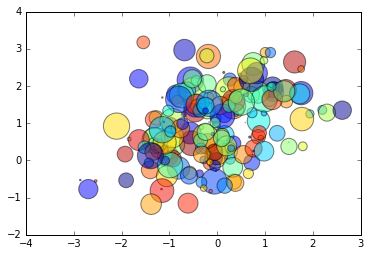

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
colors = np.random.rand(len(df.x))
area = np.pi * (15 * np.random.rand(len(df.x)))**2  # 0 to 15 point radiuses
plt.scatter(df.x,df.y,s = area, c=colors, alpha=0.5)
plt.show()


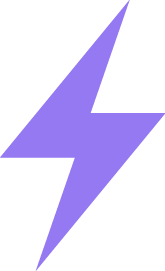

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

/Users/tomas/miniconda2/envs/py27_nb/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning:

The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.



In [17]:
from lightning import Lightning
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')
n=1000
#cp = [asarray(color_palette('Blues', 100)[random.choice(range(100))])*255 for i in range(n)]
ap = np.random.rand(n)
sp = np.random.rand(n)*15+8
lgn.scatter(df['x'],df['y'], values=df['zz'],alpha=ap, size=sp,colormap='YlOrRd')

# BOKEH

<img src="images/bokeh.png" alt="Drawing" style="width: 600px;" border="black"/>



In [18]:
from bokeh.io import output_notebook, show
output_notebook()
# http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/tutorial/01%20-%20charts.ipynb

Loading BokehJS ...

In [19]:
from bokeh.charts import Scatter

p = Scatter(df, x='x', y='y', color='grp', legend='top_left')
show(p)

In [20]:
# Possible tools are: box_select, box_zoom, click, crosshair, 
# help, hover, lasso_select, pan, poly_select, previewsave, 
# reset, resize, save, tap, wheel_zoom, 
# xpan, xwheel_zoom, ypan or ywheel_zoom
TOOLS = 'pan,box_zoom,reset,'

In [21]:
from bokeh.charts import BoxPlot
p = BoxPlot(
    df, label='grp', values='x', tools='crosshair',
    xlabel='', ylabel='x values', title='Distribution of ...'
)
show(p)


In [22]:
from bokeh.charts import Bar
p = Bar(
    df, label='grp', values='y', agg='median', 
    group='grp', # Use the group feature
    title="Median MPG by YR, grouped by ORIGIN", legend='top_left', tools='crosshair'
)
show(p)



In [23]:


from bokeh.charts import Bar
p = Bar(
    df, label='grp', values='y', agg='median', 
    stack='grpX', # Use the stack feature
    title="Median MPG by YR, stacked by ORIGIN", legend='top_left', tools='crosshair'
)
show(p)



In [24]:
from bokeh.charts import Histogram
hist = Histogram(df, values='y', color='grp', bins=10, legend=True)
show(hist)

In [25]:
from bokeh.plotting import figure
from bokeh.io import gridplot

x = list(range(11))
y0, y1, y2 = x, [10-i for i in x], [abs(i-5) for i in x]

# create a new plot
s1 = figure(width=250, plot_height=250)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(width=250, height=250)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create and another
s3 = figure(width=250, height=250)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# put all the plots in an HBox
p = gridplot([[s1, s2, s3]], toolbar_location=None)

# show the results
show(p)

# Linked panning

In [26]:
plot_options = dict(width=250, plot_height=250, title=None, tools='pan')

# create a new plot
s1 = figure(**plot_options)
s1.circle(x, y0, size=10, color="navy")

# create a new plot and share both ranges
s2 = figure(x_range=s1.x_range, y_range=s1.y_range, **plot_options)
s2.triangle(x, y1, size=10, color="firebrick")

# create a new plot and share only one range
s3 = figure(x_range=s1.x_range, **plot_options)
s3.square(x, y2, size=10, color="olive")

p = gridplot([[s1, s2, s3]])

# show the results
show(p)

# Linked brushing

In [27]:
from bokeh.models import ColumnDataSource

#x = list(range(-20, 21))
#y0, y1 = [abs(xx) for xx in x], [xx**2 for xx in x]

x=df.x
y0=df.y
y1=df.w
# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=x, y0=y0, y1=y1))

TOOLS = "box_select,lasso_select,help"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=300, height=300)
left.circle('x', 'y0', source=source)

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=300, height=300)
right.circle('x', 'y1', source=source)

p = gridplot([[left, right]])

show(p)

# Hover Tools

In [28]:
from bokeh.models import HoverTool

source = ColumnDataSource(
        data=dict(
            x=[1, 2, 3, 4, 5],
            y=[2, 5, 8, 2, 7],
            desc=['A', 'b', 'C', 'd', 'E'],
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("desc", "@desc"),
        ]
    )

p = figure(plot_width=300, plot_height=300, tools=[hover], title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

# Also show custom hover 
#from utils import get_custom_hover

#show(gridplot([[p, get_custom_hover()]]))
show(p)

# Calbacks for selections

In [29]:
from bokeh.models import TapTool, CustomJS, ColumnDataSource
from random import random


#x = [random() for x in range(500)]
#y = [random() for y in range(500)]
x=df.x
y=df.y
color = ["navy"] * len(x)

s = ColumnDataSource(data=dict(x=x, y=y, color=color))
p = figure(plot_width=400, plot_height=400, tools="lasso_select", title="Select Here")
p.circle('x', 'y', color='color', size=8, source=s, alpha=0.4)

s2 = ColumnDataSource(data=dict(ym=[0.5, 0.5]))
p.line(x=[0,1], y='ym', color="orange", line_width=5, alpha=0.6, source=s2)

s.callback = CustomJS(args=dict(s2=s2), code="""
    var inds = cb_obj.get('selected')['1d'].indices;
    var d = cb_obj.get('data');
    var ym = 0
    
    if (inds.length == 0) { return; }
    
    for (i = 0; i < d['color'].length; i++) {
        d['color'][i] = "navy"
    }
    for (i = 0; i < inds.length; i++) {
        d['color'][inds[i]] = "firebrick"
        ym += d['y'][inds[i]]
    }
    
    ym /= inds.length
    s2.get('data')['ym'] = [ym, ym]
    
    cb_obj.trigger('change');
    s2.trigger('change');
""")

show(p)

/Users/tomas/miniconda2/envs/py27_nb/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning:


Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.


